In [1]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier  

# 导入sklearn中自带的iris数据集
iris = load_iris()

'''
AdaBoostClassifier参数解释
base_estimator: 弱分类器，默认是CART分类树：DecisionTressClassifier
algorithm：     在scikit-learn实现了两种AdaBoost分类算法，即SAMME和SAMME.R，
                SAMME指Discrete AdaBoost
                SAMME.R指Real AdaBoost，返回值不再是离散的类型，而是一个表示概率的实数
                
                两者的主要区别是弱分类器权重的度量，SAMME用分类结果作为弱分类器权重，SAMME.R用预测概率作为弱分类器权重；
                SAMME.R的迭代一般比SAMME快，默认算法是SAMME.R
                因此，base_estimator必须使用支持概率预测的分类器
loss：          损失值
n_estimator:    最大迭代次数，默认50
learning_rate:  每个弱分类器的权重缩减系数v，即学习步长
                较小的v意味着更大的迭代次数，默认是1，也就是v不发挥作用
'''
#构建模型
clf = AdaBoostClassifier(n_estimators = 100)    #弱分类器个数设为100
scores = cross_val_score(clf, iris.data, iris.target)    # 交叉验证调参
print(scores)    # 输出所有测试准确率
print(scores.mean())    # 对100次迭代计算平均的测试准确率

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[0.98039216 0.94117647 0.95833333]
0.9599673202614379


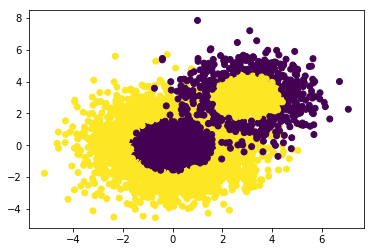

0.9669117647058822


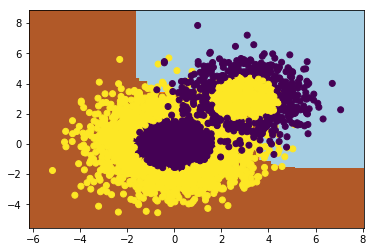

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
%matplotlib inline

# 用make_gaussian_quantiles生成多组多维正态分布的数据
# 这里生成2维正态分布，设定样本数5000，协方差2
x1, y1 = make_gaussian_quantiles(cov = 2., n_samples = 5000, n_features = 2, n_classes = 2, shuffle = True, random_state = 1)
# 为了增加样本分布的复杂度，再生成一个数据分布
x2, y2 = make_gaussian_quantiles(mean = (3, 3), cov = 1.5, n_samples = 1000, n_features = 2, n_classes = 2, shuffle = True, random_state = 1)
#合并
X = np.vstack((x1, x2))
y = np.hstack((y1, 1 - y2))
plt.scatter(X[:, 0],X[:, 1],c = y)
plt.show()

# 设定弱分类器CART
weakClassifier = DecisionTreeClassifier(max_depth = 1)

# 构建模型
clf = AdaBoostClassifier(base_estimator = weakClassifier, algorithm = 'SAMME', n_estimators = 300, learning_rate = 0.8)
clf.fit(X, y)
scores = cross_val_score(clf, iris.data, iris.target)    # 交叉验证调参
print(scores.mean())

# 绘制分类效果
x1_min = X[:,0].min() - 1
x1_max = X[:,0].max() + 1
x2_min = X[:,1].min() - 1
x2_max = X[:,1].max() + 1
x1_, x2_ = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

y_ = clf.predict(np.c_[x1_.ravel(), x2_.ravel()])
y_ = y_.reshape(x1_.shape)
plt.contourf(x1_, x2_, y_, cmap = plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()